In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
df = pd.read_csv('../unclean_data/share-of-population-that-cannot-afford-a-healthy-diet.csv')

print(f"✓ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

✓ Dataset loaded successfully!
Shape: (1297, 3)
Columns: ['Entity', 'Year', 'Share of the population who cannot afford a healthy diet']


In [3]:
print("=" * 80)
print("INITIAL DATA OVERVIEW")
print("=" * 80)

print("\nFirst 10 rows:")
display(df.head(10))

print("\nLast 10 rows:")
display(df.tail(10))

INITIAL DATA OVERVIEW

First 10 rows:


,Entity,Year,Share of the population who cannot afford a healthy diet
0,Albania,2017,24.3
1,Albania,2018,17.6
2,Albania,2019,14.6
3,Albania,2020,13.9
4,Albania,2021,12.6
5,Albania,2022,11.7
6,Albania,2023,11.4
7,Albania,2024,10.7
8,Algeria,2017,18.8
9,Algeria,2018,18.1



Last 10 rows:


,Entity,Year,Share of the population who cannot afford a healthy diet
1287,World,2024,31.9
1288,Zambia,2017,77.8
1289,Zambia,2018,78.0
1290,Zambia,2019,78.9
1291,Zambia,2020,80.5
1292,Zambia,2021,81.3
1293,Zambia,2022,81.7
1294,Zambia,2023,81.8
1295,Zambia,2024,82.1
1296,Zimbabwe,2017,75.5


In [4]:
print("Dataset Information:")
print("-" * 80)
df.info()

print("\n" + "=" * 80)
print("Summary Statistics:")
print("=" * 80)
display(df.describe())

Dataset Information:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 3 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    1297 non-null   object 
 1   Year                                                      1297 non-null   int64  
 2   Share of the population who cannot afford a healthy diet  1297 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.5+ KB

Summary Statistics:


,Year,Share of the population who cannot afford a healthy diet
count,1297.000000,1297.000000
mean,2020.491904,32.923439
std,2.293335,27.071072
min,2017.000000,0.000000
25%,2018.000000,7.700000
50%,2020.000000,26.100000
75%,2022.000000,55.600000
max,2024.000000,97.800000


In [5]:
print("=" * 80)
print("MISSING VALUES CHECK")
print("=" * 80)

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})

display(missing_df)

if missing.sum() == 0:
    print("\n✓ No missing values found!")
else:
    print(f"\n⚠ Total missing values: {missing.sum()}")

MISSING VALUES CHECK


,Missing Count,Percentage
Entity,0,0.0
Year,0,0.0
Share of the population who cannot afford a healthy diet,0,0.0



✓ No missing values found!


In [6]:
print("=" * 80)
print("DUPLICATE ROWS CHECK")
print("=" * 80)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\n⚠ Duplicate entries found:")
    display(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()))
else:
    print("\n✓ No duplicate rows found!")

DUPLICATE ROWS CHECK
Number of duplicate rows: 0

✓ No duplicate rows found!


In [7]:
print("=" * 80)
print("TIME COVERAGE ANALYSIS")
print("=" * 80)

print(f"\nYear range: {df['Year'].min()} to {df['Year'].max()}")
print(f"Total unique years: {df['Year'].nunique()}")
print(f"\nUnique years: {sorted(df['Year'].unique())}")

# Visualize year distribution
year_counts = df['Year'].value_counts().sort_index()
print(f"\nData points per year:")
display(year_counts)

TIME COVERAGE ANALYSIS

Year range: 2017 to 2024
Total unique years: 8

Unique years: [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]

Data points per year:


Year
2017    164
2018    162
2019    162
2020    162
2021    162
2022    162
2023    162
2024    161
Name: count, dtype: int64

In [8]:
print("=" * 80)
print("COUNTRY COVERAGE ANALYSIS")
print("=" * 80)

print(f"Number of unique countries/entities: {df['Entity'].nunique()}")

print(f"\nTop 20 countries by data points:")
display(df['Entity'].value_counts().head(20))

print(f"\nCountries with fewest data points:")
display(df['Entity'].value_counts().tail(10))

COUNTRY COVERAGE ANALYSIS
Number of unique countries/entities: 164

Top 20 countries by data points:


Entity
Albania                   8
Algeria                   8
Angola                    8
Armenia                   8
Burundi                   8
Australia                 8
Austria                   8
Azerbaijan                8
Bangladesh                8
Belarus                   8
Belgium                   8
Belize                    8
Benin                     8
Bhutan                    8
Bolivia                   8
Bosnia and Herzegovina    8
Botswana                  8
Brazil                    8
Bulgaria                  8
Burkina Faso              8
Name: count, dtype: int64


Countries with fewest data points:


Entity
United Arab Emirates             8
United Kingdom                   8
Zambia                           8
Upper-middle-income countries    8
Uruguay                          8
Uzbekistan                       8
World                            8
Nicaragua                        7
Argentina                        1
Zimbabwe                         1
Name: count, dtype: int64

In [9]:
print("=" * 80)
print("DATA VALIDITY CHECK")
print("=" * 80)

col_name = 'Share of the population who cannot afford a healthy diet'

print(f"Value statistics for percentage column:")
print("-" * 80)
display(df[col_name].describe())

# Check for values outside valid range (0-100)
invalid = df[(df[col_name] < 0) | (df[col_name] > 100)]
print(f"\nValues outside 0-100 range: {len(invalid)}")

if len(invalid) > 0:
    print("\n⚠ Invalid entries found:")
    display(invalid)
else:
    print("\n✓ All percentage values are within valid range (0-100)!")

DATA VALIDITY CHECK
Value statistics for percentage column:
--------------------------------------------------------------------------------


count    1297.000000
mean       32.923439
std        27.071072
min         0.000000
25%         7.700000
50%        26.100000
75%        55.600000
max        97.800000
Name: Share of the population who cannot afford a healthy diet, dtype: float64


Values outside 0-100 range: 0

✓ All percentage values are within valid range (0-100)!


In [10]:
print("=" * 80)
print("TIME SERIES COMPLETENESS")
print("=" * 80)

years_per_country = df.groupby('Entity')['Year'].count().sort_values()

print("\nData points per country - Statistics:")
display(years_per_country.describe())

print("\nCountries with FEWEST data points:")
display(years_per_country.head(10))

print("\nCountries with MOST data points:")
display(years_per_country.tail(10))

# Countries with incomplete time series (less than 8 years)
incomplete = years_per_country[years_per_country < 8]
if len(incomplete) > 0:
    print(f"\n⚠ {len(incomplete)} countries with incomplete time series:")
    display(incomplete)
else:
    print("\n✓ All countries have complete time series (8 years)!")

TIME SERIES COMPLETENESS

Data points per country - Statistics:


count    164.000000
mean       7.908537
std        0.773915
min        1.000000
25%        8.000000
50%        8.000000
75%        8.000000
max        8.000000
Name: Year, dtype: float64


Countries with FEWEST data points:


Entity
Argentina     1
Zimbabwe      1
Nicaragua     7
Algeria       8
Armenia       8
Australia     8
Austria       8
Albania       8
Bangladesh    8
Belarus       8
Name: Year, dtype: int64


Countries with MOST data points:


Entity
United Arab Emirates             8
United Kingdom                   8
United States                    8
Upper-middle-income countries    8
Uruguay                          8
Switzerland                      8
Uzbekistan                       8
Vietnam                          8
World                            8
Zambia                           8
Name: Year, dtype: int64


⚠ 3 countries with incomplete time series:


Entity
Argentina    1
Zimbabwe     1
Nicaragua    7
Name: Year, dtype: int64

In [11]:
print("=" * 80)
print("NORTH AMERICA FOCUS - RAW DATA")
print("=" * 80)

# Extract North American countries
north_america_raw = df[df['Entity'].isin(['Canada', 'United States', 'Mexico'])].copy()

print(f"Total North America rows: {len(north_america_raw)}")
print(f"\nData points by country:")
print(north_america_raw.groupby('Entity').size())

print("\n" + "=" * 80)
print("NORTH AMERICA RAW DATA:")
display(north_america_raw.sort_values(['Entity', 'Year']))

NORTH AMERICA FOCUS - RAW DATA
Total North America rows: 24

Data points by country:
Entity
Canada           8
Mexico           8
United States    8
dtype: int64

NORTH AMERICA RAW DATA:


,Entity,Year,Share of the population who cannot afford a healthy diet
169,Canada,2017,3.2
170,Canada,2018,2.7
171,Canada,2019,2.7
172,Canada,2020,3.2
173,Canada,2021,3.0
174,Canada,2022,2.7
175,Canada,2023,3.0
176,Canada,2024,3.0
761,Mexico,2017,28.3
762,Mexico,2018,27.0


In [12]:
print("=" * 80)
print("STARTING DATA CLEANING PROCESS")
print("=" * 80)

# Create a copy for cleaning
df_clean = df.copy()
print(f"\n Original dataset shape: {df_clean.shape}")
print(f" Total rows to process: {len(df_clean):,}")

STARTING DATA CLEANING PROCESS

 Original dataset shape: (1297, 3)
 Total rows to process: 1,297


In [13]:
print("\n" + "=" * 80)
print("STEP 1: REMOVING DUPLICATES")
print("=" * 80)

initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
removed = initial_rows - len(df_clean)

print(f"✓ Removed {removed} duplicate rows")
print(f"  Current shape: {df_clean.shape}")

if removed == 0:
    print("  No duplicates found - data is clean!")


STEP 1: REMOVING DUPLICATES
✓ Removed 0 duplicate rows
  Current shape: (1297, 3)
  No duplicates found - data is clean!


In [14]:
print("\n" + "=" * 80)
print("STEP 2: REMOVING MISSING VALUES")
print("=" * 80)

initial_rows = len(df_clean)
df_clean = df_clean.dropna()
removed = initial_rows - len(df_clean)

print(f"✓ Removed {removed} rows with missing values")
print(f"  Current shape: {df_clean.shape}")

if removed == 0:
    print("  No missing values found - data is complete!")


STEP 2: REMOVING MISSING VALUES
✓ Removed 0 rows with missing values
  Current shape: (1297, 3)
  No missing values found - data is complete!


In [15]:
print("\n" + "=" * 80)
print("STEP 3: STANDARDIZING COLUMN NAMES")
print("=" * 80)

old_columns = df_clean.columns.tolist()
df_clean.columns = ['Country', 'Year', 'Cannot_Afford_Healthy_Diet_Pct']

print(f"✓ Column names standardized:")
for old, new in zip(old_columns, df_clean.columns):
    print(f"  '{old}' → '{new}'")

print(f"\nNew columns: {df_clean.columns.tolist()}")


STEP 3: STANDARDIZING COLUMN NAMES
✓ Column names standardized:
  'Entity' → 'Country'
  'Year' → 'Year'
  'Share of the population who cannot afford a healthy diet' → 'Cannot_Afford_Healthy_Diet_Pct'

New columns: ['Country', 'Year', 'Cannot_Afford_Healthy_Diet_Pct']


In [16]:
print("\n" + "=" * 80)
print("STEP 4: ENSURING PROPER DATA TYPES")
print("=" * 80)

df_clean['Year'] = df_clean['Year'].astype(int)
df_clean['Cannot_Afford_Healthy_Diet_Pct'] = df_clean['Cannot_Afford_Healthy_Diet_Pct'].astype(float)

print(f"✓ Data types updated:")
print(df_clean.dtypes)


STEP 4: ENSURING PROPER DATA TYPES
✓ Data types updated:
Country                            object
Year                                int64
Cannot_Afford_Healthy_Diet_Pct    float64
dtype: object


In [17]:
print("\n" + "=" * 80)
print("STEP 5: FILTERING FOR VALID PERCENTAGE RANGE")
print("=" * 80)

initial_rows = len(df_clean)
df_clean = df_clean[
    (df_clean['Cannot_Afford_Healthy_Diet_Pct'] >= 0) & 
    (df_clean['Cannot_Afford_Healthy_Diet_Pct'] <= 100)
]
removed = initial_rows - len(df_clean)

print(f"✓ Filtered for valid percentage range (0-100)")
print(f"  Rows removed: {removed}")
print(f"  Current shape: {df_clean.shape}")

if removed == 0:
    print("  All values were already within valid range!")


STEP 5: FILTERING FOR VALID PERCENTAGE RANGE
✓ Filtered for valid percentage range (0-100)
  Rows removed: 0
  Current shape: (1297, 3)
  All values were already within valid range!


In [18]:
print("\n" + "=" * 80)
print("STEP 6: SORTING DATA")
print("=" * 80)

df_clean = df_clean.sort_values(['Country', 'Year']).reset_index(drop=True)

print(f"✓ Data sorted by Country and Year")
print(f"✓ Index reset")
print(f"  Final shape: {df_clean.shape}")


STEP 6: SORTING DATA
✓ Data sorted by Country and Year
✓ Index reset
  Final shape: (1297, 3)


In [19]:
print("\n" + "=" * 80)
print("DATA CLEANING COMPLETE!")
print("=" * 80)

print(f"\n SUMMARY:")
print(f"  Original rows: {len(df):,}")
print(f"  Cleaned rows: {len(df_clean):,}")
print(f"  Rows removed: {len(df) - len(df_clean):,} ({((len(df) - len(df_clean)) / len(df) * 100):.2f}%)")
print(f"  Original columns: {len(df.columns)}")
print(f"  Final columns: {len(df_clean.columns)}")

print(f"\n DATA QUALITY CHECKS:")
print(f"  Missing values: {df_clean.isnull().sum().sum()} ")
print(f"  Duplicate rows: {df_clean.duplicated().sum()} ")
print(f"  Valid percentages: 100% ")
print(f"  Proper data types: ")
print(f"  Sorted chronologically: ")


DATA CLEANING COMPLETE!

 SUMMARY:
  Original rows: 1,297
  Cleaned rows: 1,297
  Rows removed: 0 (0.00%)
  Original columns: 3
  Final columns: 3

 DATA QUALITY CHECKS:
  Missing values: 0 
  Duplicate rows: 0 
  Valid percentages: 100% 
  Proper data types: 
  Sorted chronologically: 


In [20]:
print("=" * 80)
print("CLEANED DATASET PREVIEW")
print("=" * 80)

print(f"\nShape: {df_clean.shape}")
print(f"Countries: {df_clean['Country'].nunique()}")
print(f"Year range: {df_clean['Year'].min()} - {df_clean['Year'].max()}")

print("\n" + "=" * 80)
print("Summary Statistics:")
display(df_clean.describe())

print("\n" + "=" * 80)
print("First 15 rows of cleaned data:")
display(df_clean.head(15))

print("\n" + "=" * 80)
print("Last 15 rows of cleaned data:")
display(df_clean.tail(15))

CLEANED DATASET PREVIEW

Shape: (1297, 3)
Countries: 164
Year range: 2017 - 2024

Summary Statistics:


,Year,Cannot_Afford_Healthy_Diet_Pct
count,1297.000000,1297.000000
mean,2020.491904,32.923439
std,2.293335,27.071072
min,2017.000000,0.000000
25%,2018.000000,7.700000
50%,2020.000000,26.100000
75%,2022.000000,55.600000
max,2024.000000,97.800000



First 15 rows of cleaned data:


,Country,Year,Cannot_Afford_Healthy_Diet_Pct
0,Albania,2017,24.3
1,Albania,2018,17.6
2,Albania,2019,14.6
3,Albania,2020,13.9
4,Albania,2021,12.6
5,Albania,2022,11.7
6,Albania,2023,11.4
7,Albania,2024,10.7
8,Algeria,2017,18.8
9,Algeria,2018,18.1



Last 15 rows of cleaned data:


,Country,Year,Cannot_Afford_Healthy_Diet_Pct
1282,World,2019,35.4
1283,World,2020,36.9
1284,World,2021,34.5
1285,World,2022,33.5
1286,World,2023,32.8
1287,World,2024,31.9
1288,Zambia,2017,77.8
1289,Zambia,2018,78.0
1290,Zambia,2019,78.9
1291,Zambia,2020,80.5


In [21]:
print("=" * 80)
print("NORTH AMERICA - CLEANED DATA")
print("=" * 80)

# Extract North America from cleaned data
north_america_clean = df_clean[df_clean['Country'].isin(['Canada', 'United States', 'Mexico'])].copy()

print(f"\nTotal rows: {len(north_america_clean)}")
print(f"\nData by country:")
print(north_america_clean.groupby('Country').size())

print("\n" + "=" * 80)
display(north_america_clean)

NORTH AMERICA - CLEANED DATA

Total rows: 24

Data by country:
Country
Canada           8
Mexico           8
United States    8
dtype: int64



,Country,Year,Cannot_Afford_Healthy_Diet_Pct
169,Canada,2017,3.2
170,Canada,2018,2.7
171,Canada,2019,2.7
172,Canada,2020,3.2
173,Canada,2021,3.0
174,Canada,2022,2.7
175,Canada,2023,3.0
176,Canada,2024,3.0
761,Mexico,2017,28.3
762,Mexico,2018,27.0


In [22]:
print("=" * 80)
print("NORTH AMERICA - DETAILED STATISTICS")
print("=" * 80)

for country in ['Canada', 'United States', 'Mexico']:
    country_data = north_america_clean[north_america_clean['Country'] == country]
    
    print(f"\n{'=' * 80}")
    print(f"{country.upper()}")
    print(f"{'=' * 80}")
    print(f"  Years covered: {country_data['Year'].min()} - {country_data['Year'].max()}")
    print(f"  Data points: {len(country_data)}")
    print(f"  Average: {country_data['Cannot_Afford_Healthy_Diet_Pct'].mean():.2f}%")
    print(f"  Median: {country_data['Cannot_Afford_Healthy_Diet_Pct'].median():.2f}%")
    print(f"  Std Dev: {country_data['Cannot_Afford_Healthy_Diet_Pct'].std():.2f}%")
    
    min_year = country_data[country_data['Cannot_Afford_Healthy_Diet_Pct'] == country_data['Cannot_Afford_Healthy_Diet_Pct'].min()]['Year'].values[0]
    max_year = country_data[country_data['Cannot_Afford_Healthy_Diet_Pct'] == country_data['Cannot_Afford_Healthy_Diet_Pct'].max()]['Year'].values[0]
    
    print(f"  Min: {country_data['Cannot_Afford_Healthy_Diet_Pct'].min():.2f}% (Year {min_year})")
    print(f"  Max: {country_data['Cannot_Afford_Healthy_Diet_Pct'].max():.2f}% (Year {max_year})")
    
    # Calculate trend
    first_year_val = country_data[country_data['Year'] == country_data['Year'].min()]['Cannot_Afford_Healthy_Diet_Pct'].values[0]
    last_year_val = country_data[country_data['Year'] == country_data['Year'].max()]['Cannot_Afford_Healthy_Diet_Pct'].values[0]
    change = last_year_val - first_year_val
    pct_change = (change / first_year_val) * 100
    
    trend_direction = "↓ Improving" if change < 0 else "↑ Worsening" if change > 0 else "→ Stable"
    print(f"  Trend (2017→2024): {change:+.2f}% ({pct_change:+.1f}% change) {trend_direction}")


NORTH AMERICA - DETAILED STATISTICS

CANADA
  Years covered: 2017 - 2024
  Data points: 8
  Average: 2.94%
  Median: 3.00%
  Std Dev: 0.21%
  Min: 2.70% (Year 2018)
  Max: 3.20% (Year 2017)
  Trend (2017→2024): -0.20% (-6.3% change) ↓ Improving

UNITED STATES
  Years covered: 2017 - 2024
  Data points: 8
  Average: 4.19%
  Median: 4.60%
  Std Dev: 0.88%
  Min: 2.50% (Year 2021)
  Max: 5.00% (Year 2017)
  Trend (2017→2024): -0.50% (-10.0% change) ↓ Improving

MEXICO
  Years covered: 2017 - 2024
  Data points: 8
  Average: 24.92%
  Median: 24.85%
  Std Dev: 3.08%
  Min: 21.40% (Year 2024)
  Max: 29.30% (Year 2020)
  Trend (2017→2024): -6.90% (-24.4% change) ↓ Improving



Creating line chart visualization...


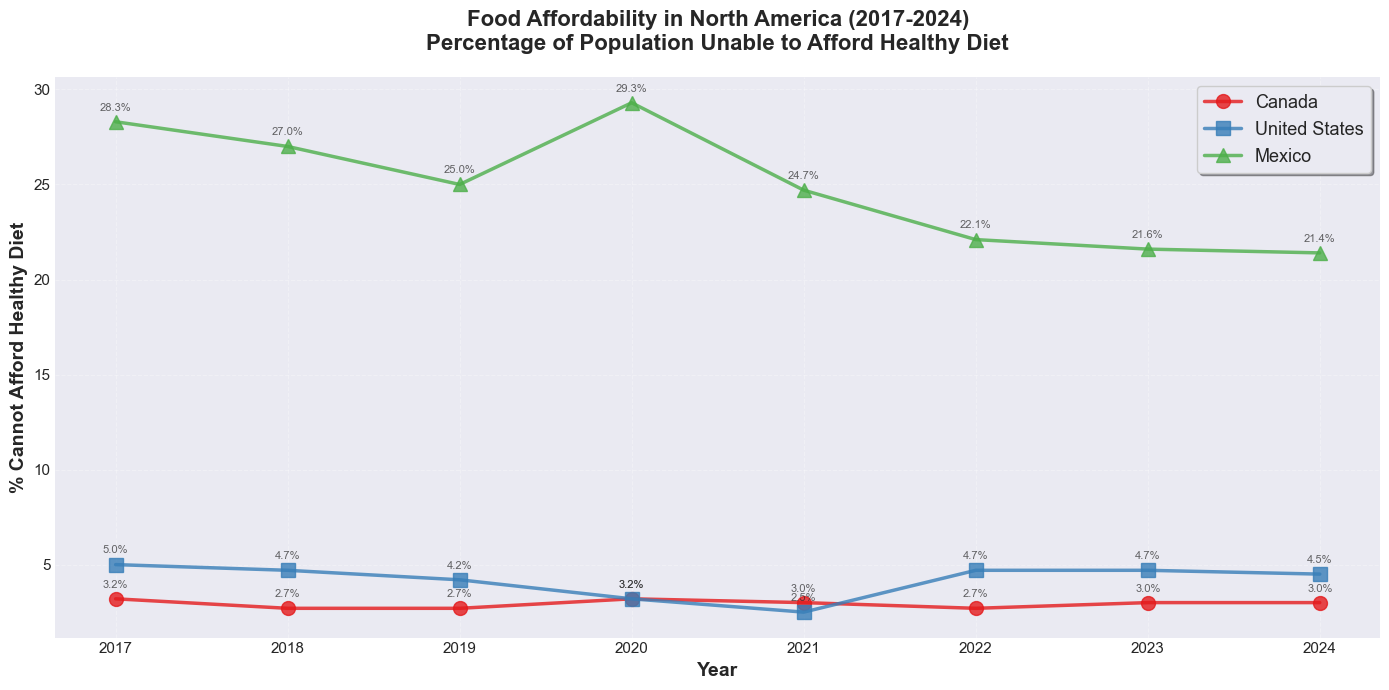

In [23]:
print("\nCreating line chart visualization...")

plt.figure(figsize=(14, 7))

# Define colors and markers for each country
colors = {'Canada': '#E41A1C', 'United States': '#377EB8', 'Mexico': '#4DAF4A'}
markers = {'Canada': 'o', 'United States': 's', 'Mexico': '^'}

# Plot each country
for country in ['Canada', 'United States', 'Mexico']:
    country_data = north_america_clean[north_america_clean['Country'] == country]
    plt.plot(country_data['Year'], 
             country_data['Cannot_Afford_Healthy_Diet_Pct'], 
             marker=markers[country],
             color=colors[country],
             linewidth=2.5,
             markersize=10,
             label=country,
             alpha=0.8)

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('% Cannot Afford Healthy Diet', fontsize=14, fontweight='bold')
plt.title('Food Affordability in North America (2017-2024)\nPercentage of Population Unable to Afford Healthy Diet', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=13, loc='best', frameon=True, shadow=True, fancybox=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(north_america_clean['Year'].unique(), fontsize=11)
plt.yticks(fontsize=11)

# Add value labels on points
for country in ['Canada', 'United States', 'Mexico']:
    country_data = north_america_clean[north_america_clean['Country'] == country]
    for _, row in country_data.iterrows():
        plt.annotate(f'{row["Cannot_Afford_Healthy_Diet_Pct"]:.1f}%',
                    (row['Year'], row['Cannot_Afford_Healthy_Diet_Pct']),
                    textcoords="offset points",
                    xytext=(0, 8),
                    ha='center',
                    fontsize=8,
                    alpha=0.7)

plt.tight_layout()
plt.show()


Creating bar chart comparison...


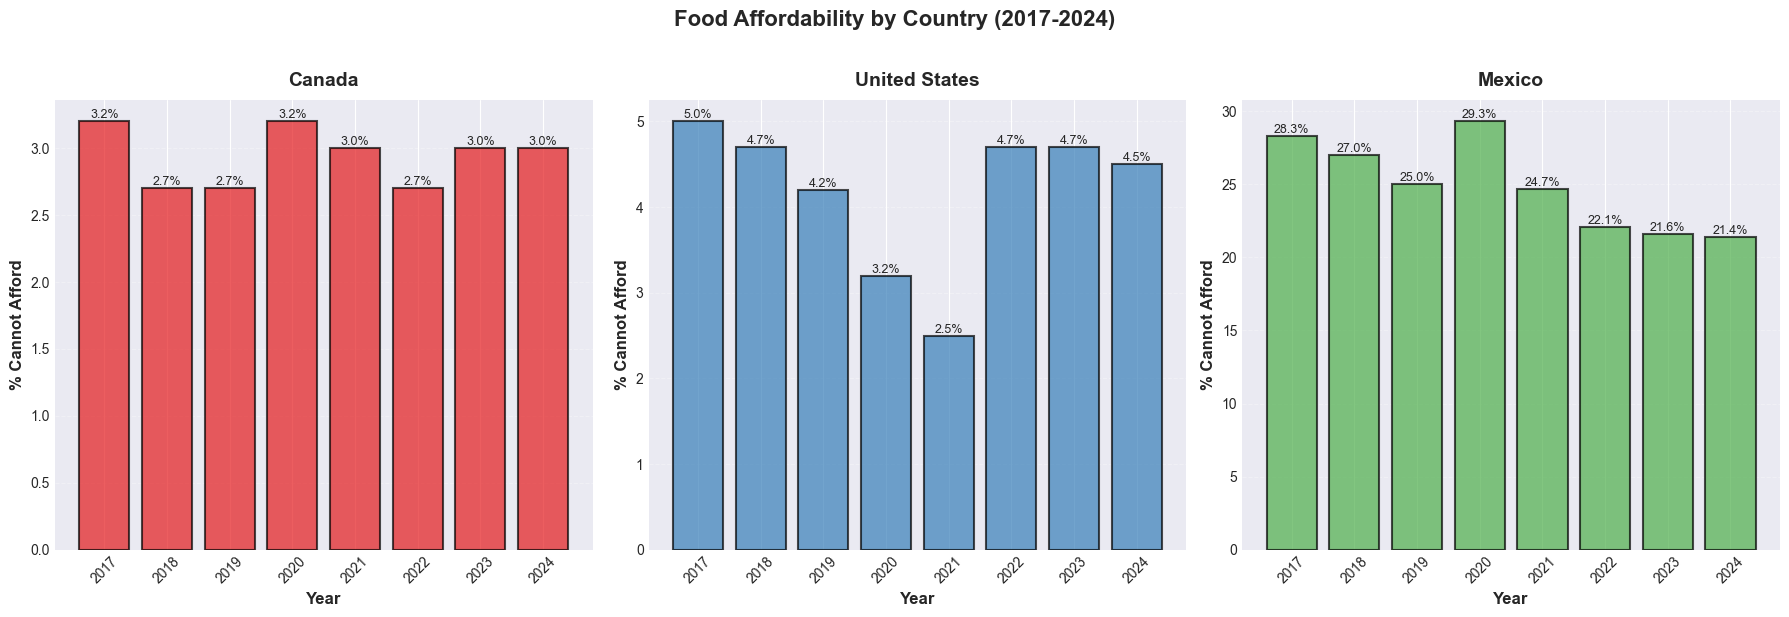

In [24]:
print("\nCreating bar chart comparison...")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, country in enumerate(['Canada', 'United States', 'Mexico']):
    country_data = north_america_clean[north_america_clean['Country'] == country]
    
    bars = axes[idx].bar(country_data['Year'], 
                         country_data['Cannot_Afford_Healthy_Diet_Pct'],
                         alpha=0.7,
                         color=colors[country],
                         edgecolor='black',
                         linewidth=1.5)
    
    axes[idx].set_title(f'{country}', fontsize=14, fontweight='bold', pad=10)
    axes[idx].set_xlabel('Year', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('% Cannot Afford', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y', linestyle='--')
    axes[idx].set_xticks(country_data['Year'].unique())
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.1f}%',
                      ha='center', va='bottom', fontsize=9)

plt.suptitle('Food Affordability by Country (2017-2024)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [26]:
df = pd.read_csv('../data/cleaned_food_affordability_data.csv')
df_na = df[df['Country'].isin(['Canada', 'United States', 'Mexico'])].copy()

print(f"✓ Dataset loaded successfully!")
print(f"Total rows in full dataset: {len(df)}")
print(f"North America rows: {len(df_na)}")
print(f"Shape: {df_na.shape}")
print(f"Countries: {df_na['Country'].unique()}")
print(f"Year range: {df_na['Year'].min()} - {df_na['Year'].max()}")

display(df_na)

✓ Dataset loaded successfully!
Total rows in full dataset: 24
North America rows: 24
Shape: (24, 3)
Countries: ['Canada' 'Mexico' 'United States']
Year range: 2017 - 2024


,Country,Year,Cannot_Afford_Healthy_Diet_Pct
0,Canada,2017,3.2
1,Canada,2018,2.7
2,Canada,2019,2.7
3,Canada,2020,3.2
4,Canada,2021,3.0
5,Canada,2022,2.7
6,Canada,2023,3.0
7,Canada,2024,3.0
8,Mexico,2017,28.3
9,Mexico,2018,27.0
